# Домашнее задание №2.2

### Тани Казаковой

### Устанавливаем проверку PEP-8.

In [1]:
! pip3 install pycodestyle flake8 pycodestyle_magic

In [2]:
%load_ext pycodestyle_magic
%pycodestyle_on

### Обрабатываем книгу с помощью Pymorthy

#### Читаем файл

In [3]:
with open('oblomov_goncharov.txt', encoding='utf-8') as f:
    book = f.read()
# print(book)  # проверить, что текст на месте

#### Устанавливаем pymorthy и ntkl

In [4]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


In [5]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

In [6]:
import nltk

In [7]:
from nltk.tokenize import word_tokenize
# nltk.download('stopwords')

#### Разбиваем текст на слова

In [8]:
tok_book = word_tokenize(book)

In [9]:
# приводим к нижнему регистру
words = [w.lower() for w in tok_book if w.isalpha()]
# print(words)  # посмотреть, что получилось

#### Разбираем

In [10]:
from pprint import pprint
parsed_words = []
for w in words:
    parsed_words.append(morph.parse(w)[0])

### Создаём таблицу

#### Разделяем данные из pymorphy

In [11]:
data = []
for word in parsed_words:
    razbor = {'lex': word.normal_form,
              'Слово': word.word,
              'ЧР': word.tag.POS,
              'Вид': word.tag.aspect,
              'Накл': word.tag.mood,
              'Залог': word.tag.voice,
              'Перех': word.tag.transitivity,
              'Время': word.tag.tense,
              'Лицо': word.tag.person,
              'Число': word.tag.number,
              'Включ': word.tag.involvement,
              'Род': word.tag.gender,
              'Падеж': word.tag.case,
              'Одуш': word.tag.animacy}
    data.append(razbor)

#### Создаём таблицу

In [12]:
import pandas as pd
df = pd.DataFrame(data)

#### Записываем в файл

In [13]:
df.to_csv('data_words_HW2(2).csv', sep='\t', index=False)

#### Начало таблицы

In [14]:
table1 = pd.read_csv('data_words_HW2(2).csv', sep='\t').fillna('')
#  читаем файл и пустые значения заполняем пустыми строками

In [15]:
table1[7:15]

,lex,Слово,ЧР,Вид,Накл,Залог,Перех,Время,Лицо,Число,Включ,Род,Падеж,Одуш
7,неоднозначный,неоднозначная,ADJF,,,,,,,sing,,femn,nomn,
8,книга,книга,NOUN,,,,,,,sing,,femn,nomn,inan
9,который,которую,ADJF,,,,,,,sing,,femn,accs,
10,считать,считают,VERB,impf,indc,,tran,pres,3per,plur,,,,
11,и,и,CONJ,,,,,,,,,,,
12,эталон,эталоном,NOUN,,,,,,,sing,,masc,ablt,inan
13,критический,критического,ADJF,,,,,,,sing,,neut,gent,
14,реализм,реализма,NOUN,,,,,,,sing,,masc,gent,inan


### Задание 2

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
random.seed = 23

#### Bar chart

Text(0, 0.5, 'кол-во вхождений')

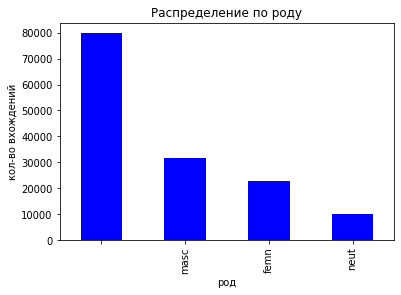

In [17]:
table1['Род'].value_counts().plot.bar(color='blue')
# барплот сразу из датафрейма
plt.title('Распределение по роду')
plt.xlabel('род')
plt.ylabel('кол-во вхождений')

#### Pie chart

Text(0.5, 1.0, 'Части речи')

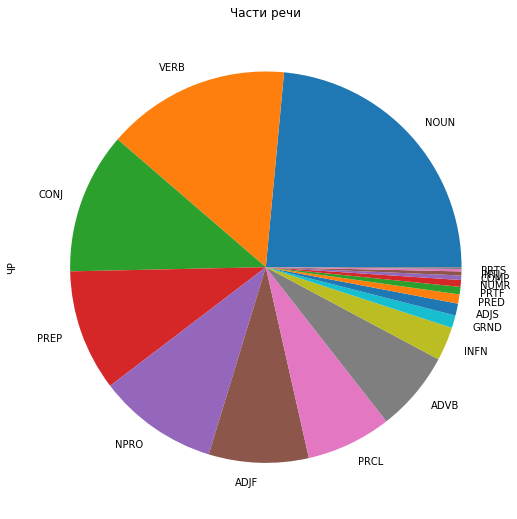

In [18]:
plt.figure(figsize=(9, 9))
table1['ЧР'].value_counts().plot(kind='pie')
plt.title('Части речи')

#### Облака

In [19]:
! pip install wordcloud

In [20]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
dop_stop = ['это', 'весь', 'который', 'мочь', 'свой']
stops = set(stopwords.words('russian') + dop_stop)

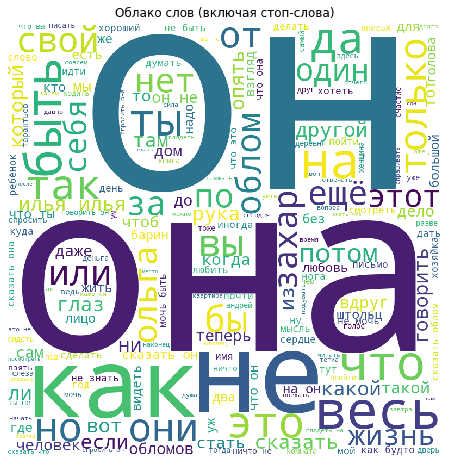

In [21]:
text = ' '.join(table1['lex'])
wordcloud = WordCloud(background_color='white',
                      width=800,
                      height=800).generate(text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Облако слов (включая стоп-слова)")
plt.show()

In [22]:
text = ' '.join([word for word in table1['lex'].values if word not in stops])

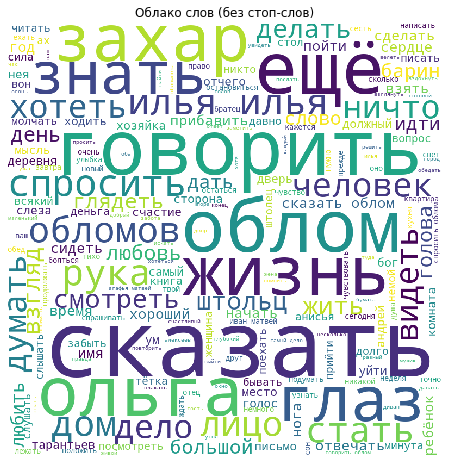

In [23]:
wordcloud = WordCloud(background_color='white',
                      width=800,
                      height=800).generate(text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако слов (без стоп-слов)')
plt.show()

### Задание №3

#### Одушевлённость vs род

Смотрим, как распределяются одушевлённые и неодушевлённые по родам. Для одушевлённых и неодушевлённых сделано по три столбика, в которых отображается кол-во слов определённого рода.

Text(0, 0.5, 'число входжений')

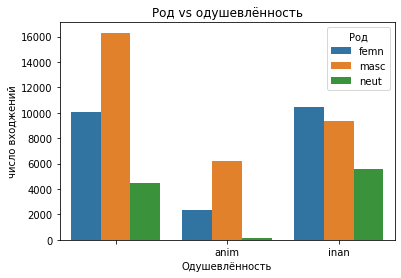

In [24]:
chart = table1[
    (table1['Род'] != '') & (table1['Род'] != 'мж')
][
    ['Одуш', 'Род', 'Число']
].groupby(['Одуш', 'Род'], as_index=False).count()

chart.columns = ['Одушевлённость', 'Род', 'total']
sns.barplot(x="Одушевлённость", y="total", hue='Род', data=chart)
plt.title('Род vs одушевлённость')
plt.xlabel('Одушевлённость')
plt.ylabel('число входжений')

#### Длина абзацев

Смотрим, какой длины (символьной) бывают абзацы, какой длины абзацы чаще всего встречаются. По оси X - количество символов в абзаце, а по Y - процент встречаемости абзаца такой длины. Абзацев определённой длины очень мало, но можно разбить их на группы по длине и считать среднее количество символов для каждой из групп. А потом обобщить. Именно этим занимается гистограмма.

Text(0.5, 0, 'Длина')

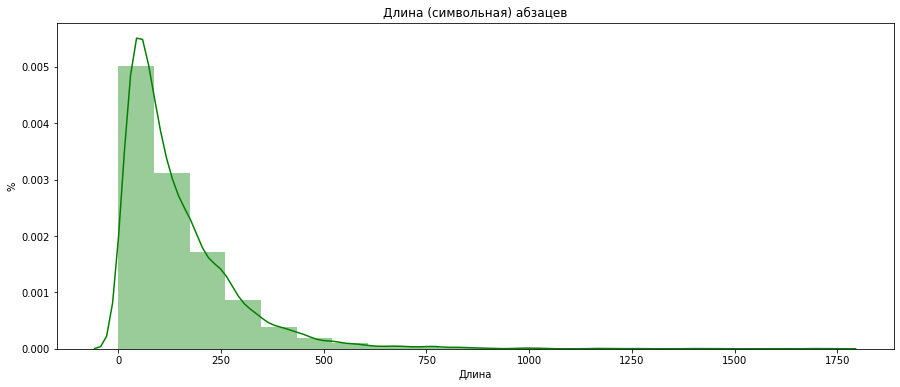

In [25]:
po_abz = book.split('\n')
inf_abz = []
for abz in po_abz:
    if abz != '':
        abz_i_len = {'length': len(abz)}
        inf_abz.append(abz_i_len)
table_abz = pd.DataFrame(inf_abz)
plt.figure(figsize=(15, 6))
sns.distplot(table_abz['length'], bins=20, color='green')
plt.title('Длина (символьная) абзацев')
plt.ylabel('%')
plt.xlabel('Длина')

### Задание №4

In [26]:
from nltk.draw.dispersion import dispersion_plot

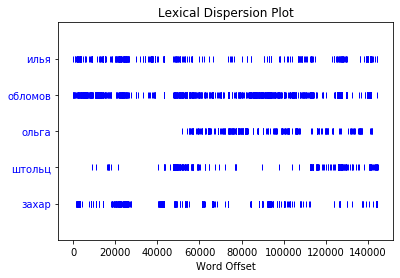

In [27]:
n = nltk.Text(words)
n.dispersion_plot(["илья", "обломов", "ольга", "штольц", "захар"])
# Можно было, конечно, объединить отметки Ильи и Обломова...
# Но давайте оставим так.